<a href="https://colab.research.google.com/github/thainguyen222/KHDLUD_NHOM1/blob/main/Report_KHDLUD_NHOM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Báo cáo đồ án môn "Khoa học dữ liệu ứng dụng"



Nhóm 1:
1. 1612571 - Trần Tiến Sỹ - AllenAlexander98
2. 1612607 - Nguyễn Quang Thái - thainguyen222
3. 18120228	- Huỳnh Nhựt Quang - huynhnhutquang7

Link thùng chứa Github của nhóm: https://github.com/thainguyen222/KHDLUD_NHOM1

## Mô tả bài toán

**Giới Thiệu Bài Toán**

  Bài toán dự đoán về lượng mưa ở các bang trung và tây Mỹ vào tháng tư đến tháng tám năm 2014, dựa vào số liệu ghi lại từ radar phân cực.
  
https://www.kaggle.com/competitions/how-much-did-it-rain-ii/

  Lượng mưa luôn là một hiện tượng thay đổi theo không gian và thời gian, cho nên việc đo lường lượng mưa cũng nổi tiếng là khó khăn để đo chính xác. Đồng hồ đo mưa là một công cụ có thể đo chính xác và hiệu quả , tuy nhiên ta lại không đặt chúng ở mọi nơi. Vì vậy, để bao phủ một phạm vi rộng lớn , người ta hay dùng đến radar thời tiết để dự báo, tuy nhiên sai lệch giữa dự báo dựa trên radar thời tiết và thực tế khá cao.
Gần đây, để cải thiện khả năng dự báo lượng mưa, the U.S National Weather Service đã thay thế các radar mạng lưới thành các radar phân cực. Điều này tạo nên độ chính xác cao hơn cho việc dự báo lượng mưa.
Trong cuộc thi này, người tham gia sẽ nhận được số liệu từ các radar mạng phân cực (22 features), từ đó dự đoán ra tổng lượng mưa theo giờ.

## Mô tả dữ liệu



Dữ liệu training đào tạo bao gồm dữ liệu NEXRAD và MADIS thu thập vào 20 ngày giữa tháng Tư và tháng Tám của năm 2014 tại các bang trồng ngô miền trung và tây nước Mỹ. Thông tin về thời gian và địa điểm đã được kiểm duyệt, và được xáo trộn để chúng không được sắp xếp theo thứ tự thời gian và địa điểm. Dữ liệu test gồm dữ liệu từ cùng 1 radar và máy đo trong những ngày còn lại trong tháng.

**Training dataset**

Các thông số được ghi lại tại các radar và máy đo ở Trung Tây Hoa Kỳ trong 20 ngày mỗi tháng trong mùa trồng ngô (tháng tư đến tháng tám), các thông số ghi lại tại cuối mỗi giờ. 

**Test dataset**

Tương tự như Training dataset, các thông số được ghi lại tại các radar và máy đo ở Trung Tây Hoa Kỳ trong 10 hoặc 11 ngày còn lại mỗi tháng trong mùa trồng ngô (tháng tư đến tháng tám) tương ứng với Training dataset. Ta cần dự đoán thông số của máy quan sát radar tại cuối mỗi giờ (tính bằng mm).

**Đánh giá**
Ở cuộc thi này, người ta dùng độ đo Mean Absolute Error (MAE).


## Mô tả file 

Cần chú ý, có nhiều máy đo trong suốt một giờ tại một điểm, và chỉ có một máy đo ở cuối giờ được tính ( cột the Expected ) được tính. Vì vậy, sẽ có nhiều dòng trùng "Id" với nhau

Các cột trong dữ liệu:
- Id: là số để phân biệt từng bộ quan sát suốt một giờ, tại một máy đo.
- minutes_past: đối với một bộ quan sát radar, minutes_past là thời gian mà radar đó đã quan sát tính theo phút từ đầu giờ. 
- radardist_km: Khoảng cách của máy đo từ radar có các quan sát đang được báo cáo.
- Ref:  Hệ số phản xạ của radar tính bằng km.
- Ref_5x5_10th: Phần trăm giá trị hệ số phản xạ thứ 10 trong vùng lân cận 5x5 xung quanh thước đo.
- Ref_5x5_50th: Phần trăm giá trị hệ số phản xạ thứ 50 trong vùng lân cận 5x5 xung quanh thước đo.
- Ref_5x5_90th: Phần trăm giá trị hệ số phản xạ thứ 90 trong vùng lân cận 5x5 xung quanh thước đo.
- RefComposite: Hệ số phản xạ tối đa trong cột dọc phía trên thước đo. Tính bằng dBZ.
- RefComposite_5x5_10th
- RefComposite_5x5_50th
- RefComposite_5x5_90th
- RhoHV: Hệ số tương quan (không đơn vị) 
- RhoHV_5x5_10th
- RhoHV_5x5_50th
- RhoHV_5x5_90th
- Zdr: Hệ số phản xạ vi sai tính bằng dB
- Zdr_5x5_10th
- Zdr_5x5_50th
- Zdr_5x5_90th
- Kdp: Pha vi sai cụ thể (độ/km)
- Kdp_5x5_10th
- Kdp_5x5_50th
- Kdp_5x5_90th

# The Solution: Recurrent Neural Networks

Dự đoán về các giá trị tích lũy từ các chuỗi vectơ có độ dài thay đổi với yếu tố 'thời gian' rất gợi nhớ đến cái gọi là Adding Problem trong Machine Learning — một nhiệm vụ hồi quy trình tự đồ chơi được thiết kế để chứng minh sức mạnh của mạng nơ-ron tuần hoàn (RNN ) trong việc học các phụ thuộc dài hạn:

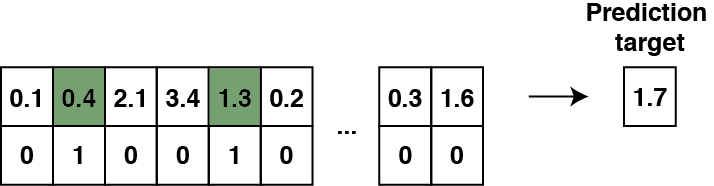

The prediction target là 1,7 có được bằng cách cộng các số ở hàng trên cùng với giá trị tương ứng ở hàng dưới cùng bằng một (tức là các ô màu xanh lá cây). Nhiệm vụ hồi quy là suy ra mô hình tổng hợp này từ một tập hợp các chuỗi ngẫu nhiên có độ dài tùy ý và mục tiêu của chúng.

Trong bài toán dự đoán lượng mưa của chúng em, có bước bổ sung là suy ra the rainfall ‘numbers’ (hàng trên cùng) từ các phép đo radar. Hơn nữa, thay vì các giá trị nhị phân 0/1 (hàng dưới cùng), một giá trị có thời gian đọc liên tục từ 0 đến 60 phút có vai trò hơi khác nhau. Tuy nhiên, những điểm tương đồng về cấu trúc cơ bản đủ thuyết phục để gợi ý rằng Recurrent Neural Networks rất phù hợp để giải quyết vấn đề.

Để có cái nhìn tổng quan về Recurrent Neural Networks, bài đăng trên blog của [Andrej Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) là một bài giới thiệu tổng quát về chủ đề này mà bạn sẽ tìm thấy ở bất cứ đâu.

# The Data

# Pre-processing
Ngay từ đầu, đã có một số thách thức do một số đặc điểm của dữ liệu mang lại:

1. Các ngoại lệ cực đoan và không thể đoán trước

2. Độ dài trình tự thay đổi và thời gian đo radar không đều

3. Tập huấn luyện với các mẫu được phân phối không độc lập

# Các ngoại lệ cực đoan và không thể đoán trước
Nó đã được ghi lại đầy đủ ngay từ đầu và được thảo luận nhiều trong diễn đàn cạnh tranh, rằng một tỷ lệ lớn các phép đo mưa hàng giờ không được tin cậy (ví dụ: máy đo mưa bị tắc). Do một số giá trị này cao hơn vài bậc so với mức độ có thể thực hiện được ở bất kỳ đâu trên trái đất, các giá trị MAE mà những người tham gia báo cáo đã bị chi phối bởi những giá trị ngoại lai cực đoan này. Tuy nhiên, vì chỉ số đánh giá là sai số trung bình tuyệt đối (MAE) chứ không phải là sai số bình phương gốc (RMSE), nên người ta có thể đơn giản xem các giá trị ngoại lai như một nguồn gây nhiễu bên ngoài.

Cách tiếp cận mà tác giả và nhiều người khác thực hiện chỉ đơn giản là loại trừ khỏi tập train các đồng hồ đo mưa có chỉ số trên 70mm. Trong suốt cuộc thi, tác giả đã thử nghiệm với một số ngưỡng khác nhau từ 53mm đến 73mm và thực hiện một vài lần chạy trong đó tác giả đã loại bỏ hoàn toàn bước tiền xử lý này. Trái ngược với những gì đã được báo cáo trong phiên bản trước của cuộc thi này, điều này có rất ít ảnh hưởng đến hiệu suất của mô hình (tích cực hoặc tiêu cực). Tác giả suy đoán rằng các mô hình RNN đã học cách bỏ qua các ngoại lệ, như được đề xuất bởi các giá trị tối đa rất hợp lý của các mức đo mưa hàng giờ dự kiến được dự đoán cho tập test (~ 45-55mm).

# Độ dài trình tự thay đổi và thời gian đo radar không đều
Các chuỗi radar thời tiết có độ dài khác nhau, từ 1 đến 19 lần đọc cho mỗi bản ghi đo mưa hàng giờ. Hơn nữa, những lần đọc này được thực hiện tại các điểm dường như ngẫu nhiên trong giờ. Nói cách khác, đây không phải là tập dữ liệu chuỗi thời gian điển hình (giá thị trường chứng khoán, v.v.).

Một tính năng hấp dẫn của RNN là chúng chấp nhận các chuỗi đầu vào có độ dài khác nhau do chia sẻ trọng lượng (weight sharing) trong các hidden layer. Bởi vì điều này, tác giả đã không thực hiện bất kỳ xử lý trước nào ngoài việc loại bỏ các ngoại lai (như mô tả ở trên) và thay thế bất kỳ giá trị tính năng radar bị thiếu nào bằng 0. Tác giả đã giữ lại từng mốc thời gian như một thành phần trong vectơ đặc trưng và giữ nguyên bản chất tuần tự của đầu vào.

# Tập huấn luyện với các mẫu được phân phối không độc lập
Tập train bao gồm dữ liệu từ 20 ngày đầu tiên của mỗi tháng và dữ liệu tập test từ những ngày còn lại. Điều này đảm bảo rằng cả hai tập hợp ít nhiều độc lập. Tuy nhiên, như đã được chỉ ra trong diễn đàn cạnh tranh, do thông tin về thời gian và địa điểm bị bỏ qua, nên không thể tạo tập con tài trợ xác thực cục bộ thực sự độc lập với phần còn lại của tập huấn luyện. Ngoài ra, không có cách nào để đảm bảo rằng hai đồng hồ đo bất kì là không có mối liên hệ về thời gian hoặc không gian. Điều này cho thấy rằng rất khó phát hiện các trường hợp overfitting mà không nộp bảng xếp hạng công khai.

# SOURCE CODE

## environment


In [ ]:
#!pip install pandas  > /dev/null
#!pip install numpy > /dev/null
#!pip install sklearn > /dev/null
#!pip install theano > /dev/null
#!pip install lasagne > /dev/null
#!pip install --upgrade https://github.com/Theano/Theano/archive/master.zip > /dev/null
!pip install --upgrade https://github.com/Lasagne/Lasagne/archive/master.zip > /dev/null



In [ ]:
!rm -r KHDLUD_NHOM1
!rm -r data
!git clone https://github.com/thainguyen222/KHDLUD_NHOM1.git
!mkdir data
!cp KHDLUD_NHOM1/train.csv data/
!cp KHDLUD_NHOM1/test.csv data/
!cp KHDLUD_NHOM1/NN_architectures.py /usr/lib/python3.7/
!unzip KHDLUD_NHOM1/Theano-master.zip > /dev/null
!rm -r /usr/local/lib/python3.7/dist-packages/theano
!mv Theano-master/theano /usr/local/lib/python3.7/dist-packages

rm: cannot remove 'KHDLUD_NHOM1': No such file or directory
rm: cannot remove 'data': No such file or directory
Cloning into 'KHDLUD_NHOM1'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 110 (delta 6), reused 0 (delta 0), pack-reused 91
Receiving objects: 100% (110/110), 17.26 MiB | 9.86 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [ ]:
#!ls /usr/local/lib/python3.7/dist-packages/theano/sandbox/
#!cat /usr/local/lib/python3.7/dist-packages/theano/sandbox/rng_mrg.py | grep MRG_RandomStreams

blocksparse.py	__init__.py	neighbours.py		     solve.py
conv.py		linalg		rng_mrg.py		     tests
cuda		minimal.py	samples_MRG31k3p_12_7_5.txt
fourier.py	multinomial.py	softsign.py


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import gc
import sys
import time
import lasagne
import lasagne.layers as LL
from lasagne.objectives import aggregate
from lasagne.random import set_rng #, get_rng
import theano
#import theano.tensor as T
from theano import tensor as T
from NN_architectures import build_1Dregression_v1
from NN_architectures import build_1Dregression_v2



## preprocess

In [ ]:
THRESHOLD = 73 
N_FOLDS = 21
RND_SEED = 56

train_raw = pd.read_csv("./data/train.csv")
raw_ids_all = train_raw["Id"]
raw_ids = raw_ids_all.unique()

####### 2. Remove ids with only NaNs in the "Ref" column #######
train_raw_tmp = train_raw[~np.isnan(train_raw.Ref)]
raw_ids_tmp = train_raw_tmp["Id"].unique()
train_new = train_raw[np.in1d(raw_ids_all, raw_ids_tmp)]

####### 3. Convert all NaN to zero #######
train_new = train_new.fillna(0.0)
train_new = train_new.reset_index(drop=True)

####### 4. Define and exclude outliers from training set #######
train_new_group = train_new.groupby('Id')
df = pd.DataFrame(train_new_group['Expected'].mean()) # mean, or any value
meaningful_ids = np.array(df[df['Expected'] < THRESHOLD].index)

####### 5. Split off holdout validation subset #######
# Count the no. of observations per hour for each gauge reading
train_new_ids_all = train_new["Id"]
obs_freq = train_new_ids_all.value_counts(ascending=True)
obs_bins = obs_freq.unique()
obs_num = ([(obs_freq==i).sum() for i in obs_bins])
obs_ids = [np.array(obs_freq.index[obs_freq.values==i]) for i in obs_bins]

# Construct stratified c.v. holdout set w.r.t. no. observations per hour
y = np.array(obs_freq)
X = np.concatenate(obs_ids)

rng = np.random.RandomState(RND_SEED)

skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=rng)
skf.get_n_splits(X, y)

#skf = cross_validation.StratifiedKFold(y, n_folds=N_FOLDS, shuffle=True, random_state=rng) 
#skf = StratifiedKFold(n_splits=N_FOLDS, y, shuffle=True, random_state=rng)

X_train_list = []
X_valid_list = []

cv = 0
for train_index, valid_index in skf.split(X,y):
    X_train, X_valid = X[train_index], X[valid_index]
    print("train.shape before: %s" % (X_train.shape))
    X_train = X_train[np.in1d(X_train, meaningful_ids)]
    
    X_train_list.append(X_train)
    X_valid_list.append(X_valid)
    print("train.shape after: %s" % (X_train.shape))
    print("valid.shape: %s" % (X_valid.shape))
    
    cv += 1
    break # remove if full n-fold cross-validation is desired

np.save("./data/processed_train", np.array(train_new))

####### 5. Save the partitioned IDs into folders #######
if not os.path.exists("train"):
    os.makedirs("train")
if not os.path.exists("valid"):
    os.makedirs("valid")
if not os.path.exists("test"):
    os.makedirs("test")
    
for i, item in enumerate(X_train_list):
    np.save("./train/obs_ids_train_cv%s" % (i), item)

for i, item in enumerate(X_valid_list):
    np.save("./valid/obs_ids_valid_cv%s" % (i), item)

####### 6. Preprocess the test data #######
test_raw = pd.read_csv("./data/test.csv")
test_raw_ids_all = test_raw["Id"]
test_raw_ids = np.array(test_raw_ids_all.unique())

# Convert all NaNs to zero
test_new = test_raw.fillna(0.0)
test_new = test_new.reset_index(drop=True)

np.save("./data/processed_test", np.array(test_new))
np.save("./test/obs_ids_test", test_raw_ids)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=21.
  UserWarning,


train.shape before: 5097
train.shape after: 5013
valid.shape: 255


## data_augmentation_train.py


In [ ]:
INPUT_WIDTH = 19 # Any length >= 19, which is the max no. of time obs per hour
CV = 0 # Cross validation set label
NUM_RAND = 60 # No. of augmented samples
COLUMNS = ['Id','minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th',
       'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite',
       'RefComposite_5x5_10th', 'RefComposite_5x5_50th',
       'RefComposite_5x5_90th', 'RhoHV', 'RhoHV_5x5_10th',
       'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr', 'Zdr_5x5_10th',
       'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th', 'Expected']


def extend_series(X, rng, target_len=19):
    curr_len = X.shape[0]
    extra_needed = target_len-curr_len
    if (extra_needed > 0):
        reps = [1]*(curr_len)
        add_ind = rng.randint(0, curr_len, size=extra_needed)
        
        new_reps = [np.sum(add_ind==j) for j in range(curr_len)]
        new_reps = np.array(reps) + np.array(new_reps)
        X = np.repeat(X, new_reps, axis=0)
    return X


####### 2. Create random seeds #######
# Any lists would do...
rng_seed_list1 = [234561, 23451, 2341, 231, 21, 678901, 67891, 6781, 671, 16, 77177]
rng_seed_list2 = list(range(9725, 9727+50*7, 7))
rng_seed_list3 = list(range(9726, 9728+50*7, 7))
#rng_seed_list = rng_seed_list1 + rng_seed_list2 + rng_seed_list3
rng_seed_list = []
rng_seed_list.extend(rng_seed_list1) 
rng_seed_list.extend(rng_seed_list2) 
rng_seed_list.extend(rng_seed_list3) 

assert len(rng_seed_list) >= NUM_RAND

####### 3. Augment training data #######
data = np.load("./data/processed_train.npy")
obs_ids_all = np.load("./train/obs_ids_train_cv%s.npy" % (CV))

data_pd = pd.DataFrame(data=data[:,0:], columns=COLUMNS)
data_pd_ids_all = np.array(data_pd['Id'])
data_pd_ids_selected = np.in1d(data_pd_ids_all, obs_ids_all)
data_pd_filtered = data_pd[data_pd_ids_selected]

data_pd_gp = pd.core.groupby.GroupBy(data_pd_filtered, "Id")
data_size = len(data_pd_gp)

for jj, rng_seed in enumerate(rng_seed_list[0:NUM_RAND]): 
    rng = np.random.RandomState(rng_seed) 
    output = np.empty((data_size, INPUT_WIDTH, 22))
    y_output = np.zeros(data_size)
    
    i = 0
    for _, group in data_pd_gp:
        group_array = np.array(group)
        X = extend_series(group_array[:,1:23], rng, target_len=INPUT_WIDTH) 
        y = group_array[0,23]
        output[i,:,:] = X[:,:]
        y_output[i]= y
        i += 1
    
    print("X.shape", X.shape)
    print("output.shape", output.shape)
    
    np.save("./train/data_train_augmented_cv%s_t%s_rand%s.npy" %
            (CV, INPUT_WIDTH, jj), output)
    np.save("./train/data_train_expected_cv%s.npy" % (CV), y_output) 
        
    gc.collect()   

X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (19, 22)
output.shape (5013, 19, 22)
X.shape (1

## data_augmentation_valid.py

In [ ]:
INPUT_WIDTH = 19 # Any length >= 19, which is the max no. of time obs per hour
CV = 0 # Cross validation set label
NUM_RAND = 1 # No. of augmented samples
COLUMNS = ['Id','minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th',
       'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite',
       'RefComposite_5x5_10th', 'RefComposite_5x5_50th',
       'RefComposite_5x5_90th', 'RhoHV', 'RhoHV_5x5_10th',
       'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr', 'Zdr_5x5_10th',
       'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th', 'Expected']



def extend_series(X, rng, target_len=19):
    curr_len = X.shape[0]
    extra_needed = target_len-curr_len
    if (extra_needed > 0):
        reps = [1]*(curr_len)
        add_ind = rng.randint(0, curr_len, size=extra_needed)
        
        new_reps = [np.sum(add_ind==j) for j in range(curr_len)]
        new_reps = np.array(reps) + np.array(new_reps)
        X = np.repeat(X, new_reps, axis=0)
    return X


####### 2. Create random seeds #######
# Any lists would do...
rng_seed_list1 = [234561, 23451, 2341, 231, 21, 678901, 67891, 6781, 671, 16, 77177]
rng_seed_list2 = list(range(9725, 9727+50*7, 7))
rng_seed_list3 = list(range(9726, 9728+50*7, 7))
rng_seed_list = []
rng_seed_list.extend(rng_seed_list1)
rng_seed_list.extend(rng_seed_list2)
rng_seed_list.extend(rng_seed_list3)
assert len(rng_seed_list) >= NUM_RAND

####### 3. Augment training data #######
data = np.load("./data/processed_train.npy")
obs_ids_all = np.load("./valid/obs_ids_valid_cv%s.npy" % (CV))

data_pd = pd.DataFrame(data=data[:,0:], columns=COLUMNS)
data_pd_ids_all = np.array(data_pd['Id'])
data_pd_ids_selected = np.in1d(data_pd_ids_all, obs_ids_all)
data_pd_filtered = data_pd[data_pd_ids_selected]

data_pd_gp = pd.core.groupby.GroupBy(data_pd_filtered, "Id")
data_size = len(data_pd_gp)

for jj, rng_seed in enumerate(rng_seed_list[0:NUM_RAND]):
    rng = np.random.RandomState(rng_seed) 
    output = np.empty((data_size, INPUT_WIDTH, 22))
    y_output = np.zeros(data_size)
    
    i = 0
    for _, group in data_pd_gp:
        group_array = np.array(group)
        X = extend_series(group_array[:,1:23], rng, target_len=INPUT_WIDTH) 
        y = group_array[0,23]
        output[i,:,:] = X[:,:]
        y_output[i]= y
        i += 1
        
    print("X.shape", X.shape)
    print("output.shape", output.shape)
    
    np.save("./valid/data_valid_augmented_cv%s_t%s_rand%s.npy" %
            (CV, INPUT_WIDTH, jj), output)
    np.save("./valid/data_valid_expected_cv%s.npy" % (CV), y_output) 
        
    gc.collect()

X.shape (19, 22)
output.shape (255, 19, 22)


## data_augmentation_test.py

In [ ]:
INPUT_WIDTH = 19 # Any length >= 19, which is the max no. of time obs per hour
NUM_RAND = 61 # No. of augmented samples
COLUMNS = ['Id','minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th',
       'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite',
       'RefComposite_5x5_10th', 'RefComposite_5x5_50th',
       'RefComposite_5x5_90th', 'RhoHV', 'RhoHV_5x5_10th',
       'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr', 'Zdr_5x5_10th',
       'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th']
       
       
####### 1. Define 'dropin' augmentation function #######
def extend_series(X, rng, target_len=19):
    curr_len = X.shape[0]
    extra_needed = target_len-curr_len
    if (extra_needed > 0):
        reps = [1]*(curr_len)
        add_ind = rng.randint(0, curr_len, size=extra_needed)
        
        new_reps = [np.sum(add_ind==j) for j in range(curr_len)]
        new_reps = np.array(reps) + np.array(new_reps)
        X = np.repeat(X, new_reps, axis=0)
    return X

####### 2. Create random seeds #######
# Any lists would do...
rng_seed_list1 = [234561, 23451, 2341, 231, 21, 678901, 67891, 6781, 671, 16, 77177]
rng_seed_list2 = list(range(9725, 9727+50*7, 7))
rng_seed_list3 = list(range(9726, 9728+50*7, 7))
rng_seed_list = []
rng_seed_list.extend(rng_seed_list1)
rng_seed_list.extend(rng_seed_list2)
rng_seed_list.extend(rng_seed_list3)
assert len(rng_seed_list) >= NUM_RAND

####### 3. Augment training data #######
data = np.load("./data/processed_test.npy")
obs_ids_all = np.load("./test/obs_ids_test.npy")

data_pd = pd.DataFrame(data=data[:,0:], columns=COLUMNS)
data_pd_ids_all = np.array(data_pd['Id'])
data_pd_ids_selected = np.in1d(data_pd_ids_all, obs_ids_all)
data_pd_filtered = data_pd[data_pd_ids_selected]

data_pd_gp = pd.core.groupby.GroupBy(data_pd_filtered, "Id")
data_size = len(data_pd_gp)

for jj, rng_seed in enumerate(rng_seed_list[0:NUM_RAND]):
    rng = np.random.RandomState(rng_seed) 
    output = np.empty((data_size, INPUT_WIDTH, 22))
    
    i = 0
    for _, group in data_pd_gp:
        group_array = np.array(group)
        X = extend_series(group_array[:,1:23], rng, target_len=INPUT_WIDTH) 
        output[i,:,:] = X[:,:]
        i += 1
        
    print("X.shape", X.shape)
    print("output.shape", output.shape)
    
    np.save("./test/data_test_augmented_t%s_rand%s.npy" % (INPUT_WIDTH, jj), output)
        
    gc.collect()
    
    


## NNregression_v1.py -v=1

In [ ]:
!pip install keras

In [41]:
def do_regression(num_epochs=60, # No. of epochs to train
                  init_file=None,  # Saved parameters to initialise training
                  epoch_size=680780,  # Whole dataset size
                  valid_size=34848,
                  train_batch_multiple=10637,  # No. of minibatches per batch
                  valid_batch_multiple=1089,  # No. of minibatches per batch
                  train_minibatch_size=64, 
                  valid_minibatch_size=32,
                  eval_multiple=50,  # No. of minibatches to ave. in report
                  save_model=True,
                  input_width=19,
                  rng_seed=100009,
                  cross_val=0,  # Cross-validation subset label
                  dataver=1,  # Label for different runs/architectures/etc
                  rate_init=1.0,
                  rate_decay=0.999983):

    ###################################################
    ################# 0. User inputs ##################
    ###################################################
    for i in range(1,len(sys.argv)):
        if sys.argv[i].startswith('-'):
            option = sys.argv[i][1:]
            if option == 'i': init_file = sys.argv[i+1]
            elif option[0:2] == 'v=' : dataver = int(option[2:])
            elif option[0:3] == 'cv=' : cross_val = int(option[3:])
            elif option[0:3] == 'rs=' : rng_seed = int(option[3:])
            elif option[0:3] == 'ri=' : rate_init = np.float32(option[3:])
            elif option[0:3] == 'rd=' : rate_decay = np.float32(option[3:])
                                
    print("Running with dataver %s" % (dataver))
    print("Running with cross_val %s" % (cross_val))
    
    
    ###################################################
    ############# 1. Housekeeping values ##############
    ###################################################
    # Batch size is possibly not equal to epoch size due to memory limits
    train_batch_size = train_batch_multiple*train_minibatch_size 
    assert epoch_size >= train_batch_size
    
    # Number of times we expect the training/validation generator to be called
    max_train_gen_calls = (num_epochs*epoch_size)//train_batch_size 

    # Number of evaluations (total minibatches / eval_multiple)
    num_eval = max_train_gen_calls*train_batch_multiple / eval_multiple
    
    
    ###################################################
    ###### 2. Define model and theano variables #######
    ###################################################
    if rng_seed is not None:
        print("Setting RandomState with seed=%i" % (rng_seed))
        rng = np.random.RandomState(rng_seed)
        set_rng(rng)
    
    print("Defining variables...")
    index = T.lscalar() # Minibatch index
    x = T.tensor3,'x') # Inputs 
    y = T.fvector('y') # Target

    
    print("Defining model...")
    network_0 = build_1Dregression_v1(
                        input_var=x,
                        input_width=input_width,
                        nin_units=12,
                        h_num_units=[64,128,256,128,64],
                        h_grad_clip=1.0,
                        output_width=1
                        )
                        
    if init_file is not None:
        print("Loading initial model parametrs...")
        init_model = np.load(init_file)
        init_params = init_model[init_model.files[0]]           
        LL.set_all_param_values([network_0], init_params)
        
    
    ###################################################                                
    ################ 3. Import data ###################
    ###################################################
    # Loading data generation model parameters
    print("Defining shared variables...")
    train_set_y = theano.shared(np.zeros(1, dtype=theano.config.floatX),
                                borrow=True) 
    train_set_x = theano.shared(np.zeros((1,1,1), dtype=theano.config.floatX),
                                borrow=True)
    
    valid_set_y = theano.shared(np.zeros(1, dtype=theano.config.floatX),
                                borrow=True)
    valid_set_x = theano.shared(np.zeros((1,1,1), dtype=theano.config.floatX),
                                borrow=True)
    
    # Validation data (pick a single augmented instance, rand0 here)
    print("Creating validation data...")    
    chunk_valid_data = np.load(
        "./valid/data_valid_augmented_cv%s_t%s_rand0.npy" 
        % (cross_val, input_width)
        ).astype(theano.config.floatX)
    chunk_valid_answers = np.load(
        "./valid/data_valid_expected_cv%s.npy" 
        % (cross_val)
        ).astype(theano.config.floatX)     
    
    print("chunk_valid_answers.shape", chunk_valid_answers.shape)
    print("Assigning validation data...")
    valid_set_y.set_value(chunk_valid_answers[:])
    valid_set_x.set_value(chunk_valid_data.transpose(0,2,1))
    
    # Create output directory
    if not os.path.exists("output_cv%s_v%s" % (cross_val, dataver)):
        os.makedirs("output_cv%s_v%s" % (cross_val, dataver))
    
    
    ###################################################                                
    ########### 4. Create Loss expressions ############
    ###################################################
    print("Defining loss expressions...")
    prediction_0 = LL.get_output(network_0) 
    train_loss = aggregate(T.abs_(prediction_0 - y.dimshuffle(0,'x')))
    print(type(train_loss))
    valid_prediction_0 = LL.get_output(network_0, deterministic=True)
    valid_loss = aggregate(T.abs_(valid_prediction_0 - y.dimshuffle(0,'x')))
    
    
    ###################################################                                
    ############ 5. Define update method  #############
    ###################################################
    print("Defining update choices...")
    params = LL.get_all_params(network_0, trainable=True)
    learn_rate = T.scalar('learn_rate', dtype=theano.config.floatX)
    
    updates = lasagne.updates.adadelta(train_loss, params,
                                       learning_rate=learn_rate)
    
    
    ###################################################                                
    ######### 6. Define train/valid functions #########
    ###################################################    
    print("Defining theano functions...")
    #y = T.cast(y, 'float64')
    train_set_y = train_set_y.reshape(train_set_y.shape[0], -1)
    
    train_model = theano.function(
        [index, learn_rate],
        train_loss,
        updates=updates,
        #on_unused_input='ignore',
        givens={
            x: train_set_x[(index*train_minibatch_size): ((index+1)*train_minibatch_size)],
            y: train_set_y[(index*train_minibatch_size): ((index+1)*train_minibatch_size)]  
        }
    )
    
    validate_model = theano.function(
        [index],
        valid_loss,
        givens={
            x: valid_set_x[index*valid_minibatch_size: (index+1)*valid_minibatch_size],
            y: valid_set_y[index*valid_minibatch_size: (index+1)*valid_minibatch_size]
        }
    )
    
    
    ###################################################                                
    ################ 7. Begin training ################
    ###################################################  
    print("Begin training...")
    sys.stdout.flush()
    
    cum_iterations = 0
    this_train_loss = 0.0
    this_valid_loss = 0.0
    best_valid_loss = np.inf
    best_iter = 0
    
    train_eval_scores = np.empty(int(num_eval))
    valid_eval_scores = np.empty(int(num_eval))
    eval_index = 0
    aug_index = 0
    
    for batch in range(max_train_gen_calls):
        start_time = time.time()        
        chunk_train_data = np.load(
            "./train/data_train_augmented_cv%s_t%s_rand%s.npy" %
            (cross_val, input_width, aug_index)
            ).astype(theano.config.floatX)
        chunk_train_answers = np.load(
            "./train/data_train_expected_cv%s.npy" % 
            (cross_val)
            ).astype(theano.config.floatX)     
            
        train_set_y.set_value(chunk_train_answers[:])
        train_set_x.set_value(chunk_train_data.transpose(0, 2, 1))
        
        # Iterate over minibatches in each batch
        for mini_index in range(train_batch_multiple):
            this_rate = np.float32(rate_init*(rate_decay**cum_iterations))
            this_train_loss += train_model(mini_index, this_rate)
            cum_iterations += 1
            
            # Report loss 
            if (cum_iterations % eval_multiple == 0):
                this_train_loss = this_train_loss / eval_multiple
                this_valid_loss = np.mean([validate_model(i) for
                                    i in range(valid_batch_multiple)])
                train_eval_scores[eval_index] = this_train_loss
                valid_eval_scores[eval_index] = this_valid_loss
                
                # Save report every five evaluations
                if ((eval_index+1) % 5 == 0):
                    np.savetxt(
                        "output_cv%s_v%s/training_scores.txt" %
                        (cross_val, dataver),
                         train_eval_scores, fmt="%.5f"
                         )
                    np.savetxt(
                        "output_cv%s_v%s/validation_scores.txt" %
                        (cross_val, dataver),
                         valid_eval_scores, fmt="%.5f"
                         )
                    np.savetxt(
                        "output_cv%s_v%s/last_learn_rate.txt" %
                        (cross_val, dataver),
                        [np.array(this_rate)], fmt="%.5f"
                        )
                
                # Save model if best validation score
                if (this_valid_loss < best_valid_loss):  
                    best_valid_loss = this_valid_loss
                    best_iter = cum_iterations-1
                    
                    if save_model:
                        np.savez("output_cv%s_v%s/model.npz" % 
                                 (cross_val, dataver),
                                 LL.get_all_param_values(network_0))
                    
                # Reset evaluation reports
                eval_index += 1
                this_train_loss = 0.0
                this_valid_loss = 0.0
                
        aug_index += 1
        
        end_time = time.time()
        print("Computing time for batch %d: %f" % (batch, end_time-start_time))
        
    print("Best validation loss %f after %d epochs" %
          (best_valid_loss, (best_iter*train_minibatch_size//epoch_size)))
    
    del train_set_x, train_set_y, valid_set_x, valid_set_y
    gc.collect()
    
    return None


if __name__ == '__main__':
    sys.argv.append("-v=1")
    print(sys.argv)
    do_regression()     


['/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py', '-f', '/root/.local/share/jupyter/runtime/kernel-7fd6c6b8-0091-4c7c-bd5c-8828cc916acd.json', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1', '-v=1']
Running with dataver 1
Running with cross_val 0
Setting RandomState with seed=100009
Defining variables...
Defining model...


ValueError: ignored

## NNregression_v2.py -v=2

In [ ]:

############################### Main ################################
def do_regression(num_epochs=60, # No. of epochs to train
                  init_file=None,  # Saved parameters to initialise training
                  epoch_size=680780,  # Whole dataset size
                  valid_size=34848, # Size of validation holdout set
                  train_batch_multiple=10637,  # No. of minibatches per batch
                  valid_batch_multiple=1089,  # No. of minibatches per batch
                  train_minibatch_size=64,
                  valid_minibatch_size=32,
                  eval_multiple=50,  # No. of minibatches to ave. in report
                  save_model=True,
                  input_width=19,
                  rng_seed=100005,
                  cross_val=0,  # Cross-validation subset label
                  dataver=2,  # Label for different runs/architectures/etc
                  rate_init=1.0,
                  rate_decay=0.999983):

    ###################################################
    ################# 0. User inputs ##################
    ###################################################
    for i in range(1,len(sys.argv)):
        if sys.argv[i].startswith('-'):
            option = sys.argv[i][1:]
            if option == 'i': init_file = sys.argv[i+1]
            elif option[0:2] == 'v=' : dataver = int(option[2:])
            elif option[0:3] == 'cv=' : cross_val = int(option[3:])
            elif option[0:3] == 'rs=' : rng_seed = int(option[3:])
            elif option[0:3] == 'ri=' : rate_init = np.float32(option[3:])
            elif option[0:3] == 'rd=' : rate_decay = np.float32(option[3:])
                                
    print("Running with dataver %s" % (dataver))
    print("Running with cross_val %s" % (cross_val))
    
    
    ###################################################
    ############# 1. Housekeeping values ##############
    ###################################################
    # Batch size is possibly not equal to epoch size due to memory limits
    train_batch_size = train_batch_multiple*train_minibatch_size 
    assert epoch_size >= train_batch_size
    
    # Number of times we expect the training/validation generator to be called
    max_train_gen_calls = (num_epochs*epoch_size)//train_batch_size 

    # Number of evaluations (total minibatches / eval_multiple)
    num_eval = max_train_gen_calls*train_batch_multiple / eval_multiple
    
    
    ###################################################
    ###### 2. Define model and theano variables #######
    ###################################################
    if rng_seed is not None:
        print("Setting RandomState with seed=%i" % (rng_seed))
        rng = np.random.RandomState(rng_seed)
        set_rng(rng)
    
    print("Defining variables...")
    index = T.lscalar() # Minibatch index
    x = T.tensor3('x') # Inputs 
    y = T.fvector('y') # Target
    
    print("Defining model...")
    network_0 = build_1Dregression_v2(
                        input_var=x,
                        input_width=input_width,
                        h_num_units=[120,120,120],
                        h_grad_clip=1.0,
                        output_width=1
                        )
                        
    if init_file is not None:
        print("Loading initial model parametrs...")
        init_model = np.load(init_file)
        init_params = init_model[init_model.files[0]]           
        LL.set_all_param_values([network_0], init_params)
        
    
    ###################################################                                
    ################ 3. Import data ###################
    ###################################################
    # Loading data generation model parameters
    print("Defining shared variables...")
    train_set_y = theano.shared(np.zeros(1, dtype=theano.config.floatX),
                                borrow=True) 
    train_set_x = theano.shared(np.zeros((1,1,1), dtype=theano.config.floatX),
                                borrow=True)
    
    valid_set_y = theano.shared(np.zeros(1, dtype=theano.config.floatX),
                                borrow=True)
    valid_set_x = theano.shared(np.zeros((1,1,1), dtype=theano.config.floatX),
                                borrow=True)
    
    # Validation data (pick a single augmented instance, rand0 here)
    print("Creating validation data...")    
    chunk_valid_data = np.load(
        "./valid/data_valid_augmented_cv%s_t%s_rand0.npy" 
        % (cross_val, input_width)
        ).astype(theano.config.floatX)
    chunk_valid_answers = np.load(
        "./valid/data_valid_expected_cv%s.npy" 
        % (cross_val)
        ).astype(theano.config.floatX)     
    
    print("chunk_valid_answers.shape", chunk_valid_answers.shape)
    print("Assigning validation data...")
    valid_set_y.set_value(chunk_valid_answers[:])
    valid_set_x.set_value(chunk_valid_data.transpose(0,2,1))
    
    # Create output directory
    if not os.path.exists("output_cv%s_v%s" % (cross_val, dataver)):
        os.makedirs("output_cv%s_v%s" % (cross_val, dataver))
    
    
    ###################################################                                
    ########### 4. Create Loss expressions ############
    ###################################################
    print("Defining loss expressions...")
    prediction_0 = LL.get_output(network_0) 
    train_loss = aggregate(T.abs_(prediction_0 - y.dimshuffle(0,'x')))
    
    valid_prediction_0 = LL.get_output(network_0, deterministic=True)
    valid_loss = aggregate(T.abs_(valid_prediction_0 - y.dimshuffle(0,'x')))
    
    
    ###################################################                                
    ############ 5. Define update method  #############
    ###################################################
    print("Defining update choices...")
    params = LL.get_all_params(network_0, trainable=True)
    learn_rate = T.scalar('learn_rate', dtype=theano.config.floatX)
    
    updates = lasagne.updates.adadelta(train_loss, params,
                                       learning_rate=learn_rate)
    
    
    ###################################################                                
    ######### 6. Define train/valid functions #########
    ###################################################    
    print("Defining theano functions...")
    train_model = theano.function(
        [index, learn_rate],
        train_loss,
        updates=updates,
        givens={
            x: train_set_x[(index*train_minibatch_size):
                            ((index+1)*train_minibatch_size)],
            y: train_set_y[(index*train_minibatch_size):
                            ((index+1)*train_minibatch_size)]  
        }
    )
    
    validate_model = theano.function(
        [index],
        valid_loss,
        givens={
            x: valid_set_x[index*valid_minibatch_size:
                            (index+1)*valid_minibatch_size],
            y: valid_set_y[index*valid_minibatch_size:
                            (index+1)*valid_minibatch_size]
        }
    )
    
    
    ###################################################                                
    ################ 7. Begin training ################
    ###################################################  
    print("Begin training...")
    sys.stdout.flush()
    
    cum_iterations = 0
    this_train_loss = 0.0
    this_valid_loss = 0.0
    best_valid_loss = np.inf
    best_iter = 0
    
    train_eval_scores = np.empty(num_eval)
    valid_eval_scores = np.empty(num_eval)
    eval_index = 0
    aug_index = 0
    
    for batch in range(max_train_gen_calls):
        start_time = time.time()        
        chunk_train_data = np.load(
            "./train/data_train_augmented_cv%s_t%s_rand%s.npy" %
            (cross_val, input_width, aug_index)
            ).astype(theano.config.floatX)
        chunk_train_answers = np.load(
            "./train/data_train_expected_cv%s.npy" % 
            (cross_val)
            ).astype(theano.config.floatX)     
            
        train_set_y.set_value(chunk_train_answers[:])
        train_set_x.set_value(chunk_train_data.transpose(0, 2, 1))
        
        # Iterate over minibatches in each batch
        for mini_index in range(train_batch_multiple):
            this_rate = np.float32(rate_init*(rate_decay**cum_iterations))
            this_train_loss += train_model(mini_index, this_rate)
            cum_iterations += 1
            
            # Report loss 
            if (cum_iterations % eval_multiple == 0):
                this_train_loss = this_train_loss / eval_multiple
                this_valid_loss = np.mean([validate_model(i) for
                                    i in range(valid_batch_multiple)])
                train_eval_scores[eval_index] = this_train_loss
                valid_eval_scores[eval_index] = this_valid_loss
                
                # Save report every five evaluations
                if ((eval_index+1) % 5 == 0):
                    np.savetxt(
                        "output_cv%s_v%s/training_scores.txt" %
                        (cross_val, dataver),
                         train_eval_scores, fmt="%.5f"
                         )
                    np.savetxt(
                        "output_cv%s_v%s/validation_scores.txt" %
                        (cross_val, dataver),
                         valid_eval_scores, fmt="%.5f"
                         )
                    np.savetxt(
                        "output_cv%s_v%s/last_learn_rate.txt" %
                        (cross_val, dataver),
                        [np.array(this_rate)], fmt="%.5f"
                        )
                
                # Save model if best validation score
                if (this_valid_loss < best_valid_loss):  
                    best_valid_loss = this_valid_loss
                    best_iter = cum_iterations-1
                    
                    if save_model:
                        np.savez("output_cv%s_v%s/model.npz" % 
                                 (cross_val, dataver),
                                 LL.get_all_param_values(network_0))
                    
                # Reset evaluation reports
                eval_index += 1
                this_train_loss = 0.0
                this_valid_loss = 0.0
                
        aug_index += 1
            
        end_time = time.time()
        print("Computing time for batch %d: %f" % (batch, end_time-start_time))
        
    print("Best validation loss %f after %d epochs" %
          (best_valid_loss, (best_iter*train_minibatch_size//epoch_size)))
    
    del train_set_x, train_set_y, valid_set_x, valid_set_y
    gc.collect()
    
    return None


if __name__ == '__main__':
    do_regression()     

Running with dataver 1
Running with cross_val 0
Setting RandomState with seed=100005
Defining variables...
Defining model...
Defining shared variables...
Creating validation data...
chunk_valid_answers.shape (255,)
Assigning validation data...
Defining loss expressions...
Defining update choices...
Defining theano functions...


TypeError: ignored